In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.fftpack import fft

## Señal Simple 

In [2]:
tn = 10
N = 1000
Ts = tn / N
fs = 1/Ts

In [3]:
fo = 1
A = 1
t1 = np.linspace(0, tn, num=N)
y1 = A*np.sin(2*np.pi*fo*t1)

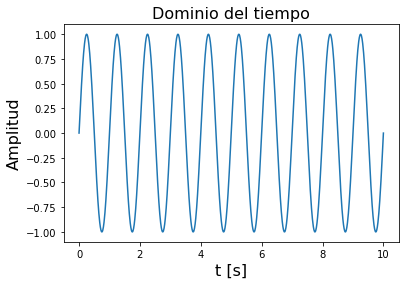

In [4]:
plt.plot(t1,y1)
plt.xlabel('t [s]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.title("Dominio del tiempo", fontsize=16)
plt.show()

In [5]:
def get_fft_values(y_values, Ts, N, fend=0):

    
    f_values = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    
    if fend != 0:
        f_range = f_values
        f_values = f_values[f_range < fend]
        fft_values = fft_values[f_range < fend]
    
    return f_values, fft_values

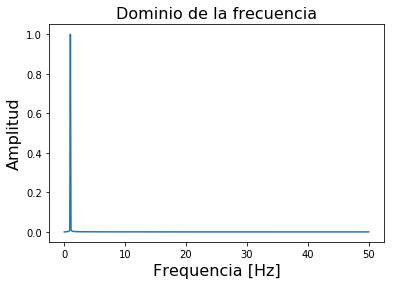

In [6]:
f_values, fft_values = get_fft_values(y1, Ts, N)

plt.plot(f_values, fft_values)
plt.xlabel('Frequencia [Hz]', fontsize=16)
plt.ylabel('Amplitud', fontsize=16)
plt.title("Dominio de la frecuencia", fontsize=16)
plt.show()

## Señal compuesta

In [7]:
tn = 1
N = 1000
Ts = tn / N
fs = 1/Ts 

In [8]:
xa = np.linspace(0, tn, num=N)
xb = np.linspace(0, tn/4, num=N//4)
 
freqs = [10, 25, 50, 95]
y1a, y1b = np.sin(2*np.pi*freqs[0]*xa), np.sin(2*np.pi*freqs[0]*xb)
y2a, y2b = np.sin(2*np.pi*freqs[1]*xa), np.sin(2*np.pi*freqs[1]*xb)
y3a, y3b = np.sin(2*np.pi*freqs[2]*xa), np.sin(2*np.pi*freqs[2]*xb)
y4a, y4b = np.sin(2*np.pi*freqs[3]*xa), np.sin(2*np.pi*freqs[3]*xb)

signal1 = y1a + y2a + y3a + y4a
signal2 = np.concatenate([y1b, y2b, y3b, y4b])

In [9]:
f_values1, fft_values1 = get_fft_values(signal1, Ts, N, 150)
f_values2, fft_values2 = get_fft_values(signal2, Ts, N, 150)

In [10]:
# fft_values1 [fft_values1 > 0.01]

In [11]:
def plot_conf(ax, title, xlabel, ylabel):
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=16)

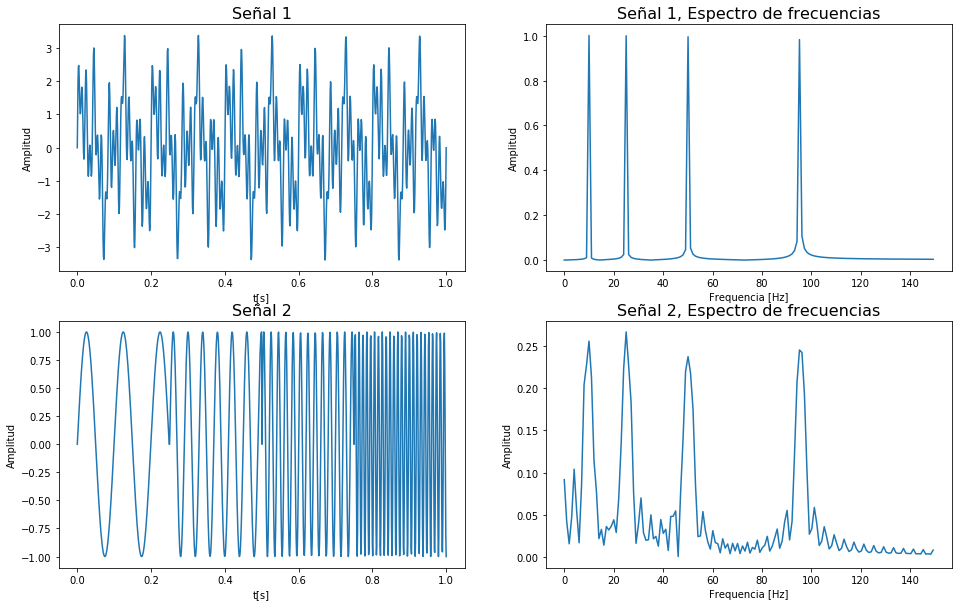

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
axs[0,0].plot(xa, signal1)
axs[1,0].plot(xa, signal2)
axs[0,1].plot(f_values1, fft_values1)
axs[1,1].plot(f_values2, fft_values2)

plot_conf(axs[0,0], 'Señal 1', 't[s]', 'Amplitud')
plot_conf(axs[1,0], 'Señal 2', 't[s]', 'Amplitud')
plot_conf(axs[0,1], 'Señal 1, Espectro de frecuencias', 'Frequencia [Hz]', 'Amplitud')
plot_conf(axs[1,1], 'Señal 2, Espectro de frecuencias', 'Frequencia [Hz]', 'Amplitud')

plt.show()

In [13]:
import pywt

In [14]:
print(pywt.families(short=True))

# discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
# continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

print(pywt.wavelist('sym'))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


In [15]:
def plot_dwt(signal, wave, lev):
    
    data = signal
    waveletname = wave
    nlevel = lev
    ni = len(data)

    fig, axarr = plt.subplots(nrows=nlevel, ncols=2, figsize=(16,2*nlevel))
    for ii in range(nlevel):
        
        ndata = int(np.ceil(len(data)/2))
        scale_values = np.linspace(0, 1, int(ndata))

        (data, coeff_d) = pywt.dwt(data, waveletname, mode = 'per')
        axarr[ii, 0].plot(scale_values, data, 'r')
        axarr[ii, 1].plot(scale_values, coeff_d, 'g')
        axarr[ii, 1].set_ylim([-5,5])
        axarr[ii, 0].set_ylim([-5,5])
        axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
        
#         if ii == 0:
#             axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
#             axarr[ii, 1].set_title("Detail coefficients", fontsize=14)

        axarr[ii, 1].set_title(str(ndata//2) + '- ' + str(ndata) + ' [Hz]', y=-0.01)
        axarr[ii, 0].set_title('0 - ' + str(ndata//2) + ' [Hz]', y=-0.01)
        
    plt.tight_layout()
    plt.show()

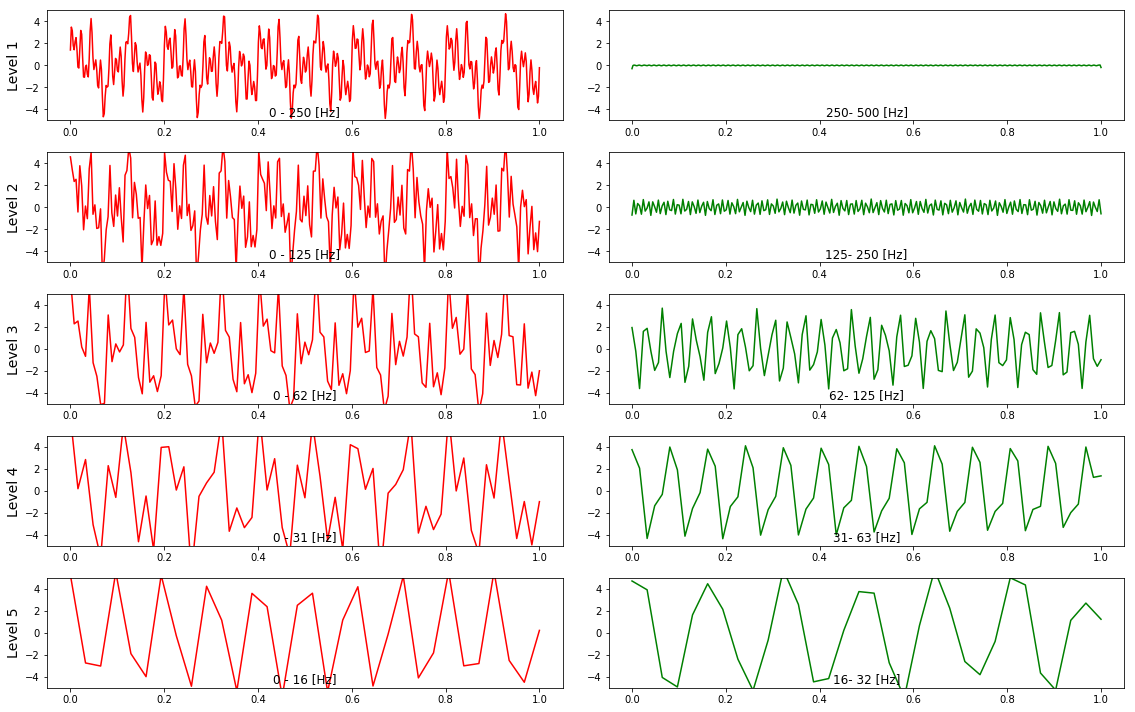

In [16]:
plot_dwt(signal1, 'sym5', 5)

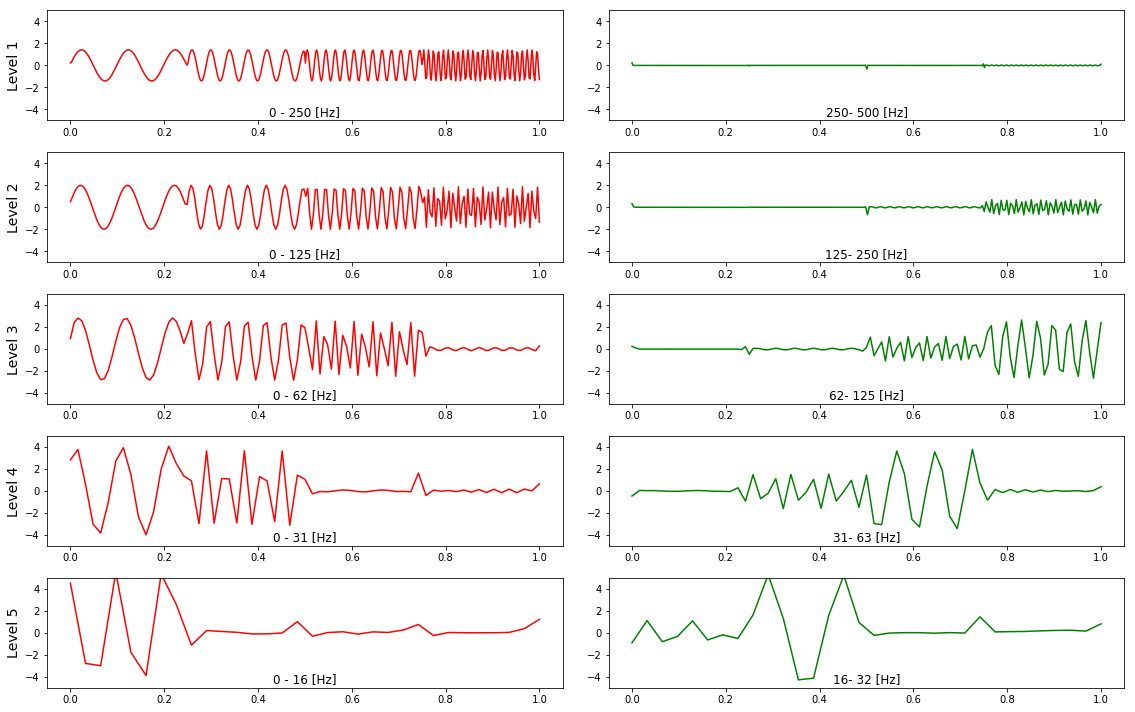

In [17]:
plot_dwt(signal2, 'sym5', 5)

In [18]:
def plot_cwt(time, signal, scales, 
                 waveletname = 'morl', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Frequency [Hz] - Log', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 8))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(1/yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    print(ylim)
#     ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

(-3.687500662433594, -9.66478058593351)


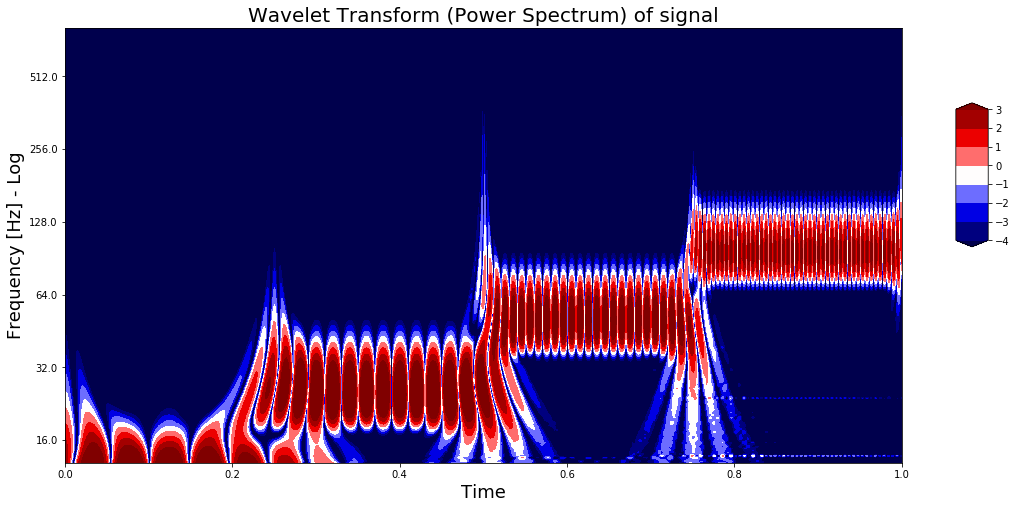

In [19]:
scales = np.arange(1, 64) # level 6 -> 
plot_cwt(xa, signal2, scales)

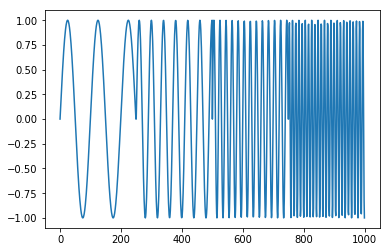

In [20]:
plt.plot(signal2)

## ECG

In [21]:
from collections import Counter
import scipy.stats
import scipy.io

In [22]:
def calculate_entropy(list_values):
    counter_values = Counter(list_values).most_common()
    probabilities = [elem[1]/len(list_values) for elem in counter_values]
    entropy=scipy.stats.entropy(probabilities)
    return entropy

def calculate_statistics(list_values):
    n5 = np.nanpercentile(list_values, 5)
    n25 = np.nanpercentile(list_values, 25)
    n75 = np.nanpercentile(list_values, 75)
    n95 = np.nanpercentile(list_values, 95)
    median = np.nanpercentile(list_values, 50)
    mean = np.nanmean(list_values)
    std = np.nanstd(list_values)
    var = np.nanvar(list_values)
    rms = np.nanmean(np.sqrt(list_values**2))
    return [n5, n25, n75, n95, median, mean, std, var, rms]

def calculate_crossings(list_values):
    
    zero_crossing_indices = np.where(np.diff(np.sign(list_values)))[0] 
    n_zero_crossings = len(zero_crossing_indices)

    return [n_zero_crossings] #, no_mean_crossings]

def get_features(list_values):
    entropy = calculate_entropy(list_values)
    crossings = calculate_crossings(list_values)
    statistics = calculate_statistics(list_values)
    return [entropy] + statistics + crossings # n_feat = 11

In [23]:
filename = './data/ECG1/ECGData.mat'
raw_data = scipy.io.loadmat(filename)

In [24]:
list_signals = raw_data['ECGData'][0][0][0]
list_signals.shape

(162, 65536)

In [25]:
list_labels = list(map(lambda x: x[0][0], raw_data['ECGData'][0][0][1]))
list_labels[:5]

['ARR', 'ARR', 'ARR', 'ARR', 'ARR']

In [26]:
N = list_signals.shape[1]
fs = 128 # Hz

tn = N/fs
print("Tiempo total: {} s.".format(int(tn)) )

Tiempo total: 512 s.


In [27]:
xa = np.linspace(0, tn, num=N)

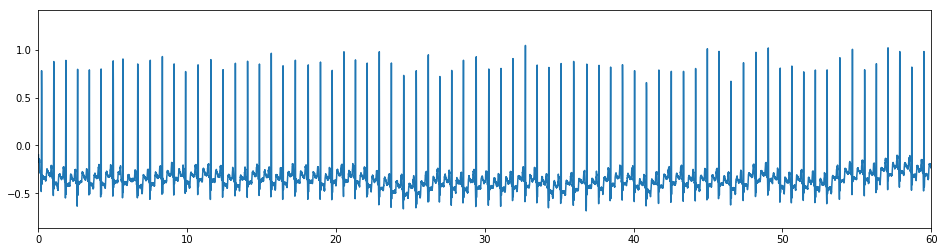

In [28]:
plt.figure(figsize = [16,4])
plt.xlim([0,60])
plt.plot(xa, list_signals[0]) # ARR

In [29]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

# Models for classification
from sklearn.ensemble import GradientBoostingClassifier

# Metrics for classification
from sklearn.metrics import precision_recall_fscore_support

#Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [30]:
# Splitting
xtr, xte , ytr , yte = train_test_split(list_signals, list_labels, test_size = 0.3, shuffle = True, random_state = 0)

In [31]:
def get_ecg_features(ecg_data, waveletname, lev = 10):

    list_features = []

    for signal in ecg_data:
        
        list_coeff = pywt.wavedec(signal, waveletname, level = lev) # n_coeff = n_level + 1
        features = []
        for coeff in list_coeff:
            features += get_features(coeff) # n_coeff*n_feat
        list_features.append(features)
    
    return list_features

In [32]:
xtr2 = np.array( get_ecg_features(xtr, 'db4') )
xte2 = np.array( get_ecg_features(xte, 'db4') )

In [56]:
name_feat_signal = [ 'entropy', 'n5','n25', 'n75', 'n95','median','mean','std','var','rms','n_zero_crossings']
n_level = 10
feat_total = []

for i in range(n_level+1):
    for feat in name_feat_signal:
        feat_total.append(feat + '_' + str(i+1))

feat_total = np.array(feat_total)
feat_total.shape

(121,)

In [87]:
df_train = pd.DataFrame(data = xtr2, columns = feat_total)
df_train.head()

,entropy_1,n5_1,n25_1,n75_1,n95_1,median_1,mean_1,std_1,var_1,rms_1,...,n5_11,n25_11,n75_11,n95_11,median_11,mean_11,std_11,var_11,rms_11,n_zero_crossings_11
0,4.248495,-15.070056,-13.921299,-11.941373,-10.951022,-13.310620,-13.009885,1.324337,1.753869,13.009885,...,-0.025365,-0.009965,0.009670,0.024402,0.000022,0.000009,0.028939,0.000837,0.015623,25880.0
1,4.248495,-12.627032,-8.174375,-6.200829,-4.928894,-7.386155,-7.503510,1.996463,3.985863,7.503510,...,-0.033217,-0.009410,0.010008,0.034693,0.000276,-0.000020,0.026897,0.000723,0.015975,14126.0
2,4.248495,-7.622807,-1.803820,-1.277651,-0.903117,-1.593559,-2.012180,1.758019,3.090632,2.012180,...,-0.076941,-0.013421,0.014270,0.073528,0.000889,0.000855,0.105890,0.011213,0.042023,18445.0
3,4.248495,-7.960411,-6.700149,-3.778394,0.350382,-5.452709,-5.018244,2.384959,5.688028,5.110092,...,-0.021175,-0.010814,0.010871,0.021977,0.000037,0.000018,0.024609,0.000606,0.014372,7308.0
4,4.248495,0.527916,2.512232,5.679247,9.040322,4.251454,4.492911,2.500364,6.251821,4.508662,...,-0.017928,-0.008038,0.007747,0.017370,-0.000359,0.000012,0.015540,0.000241,0.010304,27135.0


In [84]:
xtr2[0,:]

array([ 4.24849524e+00, -1.50700561e+01, -1.39212993e+01, -1.19413735e+01,
       -1.09510216e+01, -1.33106197e+01, -1.30098847e+01,  1.32433736e+00,
        1.75386945e+00,  1.30098847e+01,  0.00000000e+00,  4.24849524e+00,
       -5.55161729e-01, -2.96031754e-01,  2.33749185e-01,  7.42638372e-01,
       -2.70326919e-03, -2.24030919e-02,  4.43774642e-01,  1.96935933e-01,
        3.41380269e-01,  4.20000000e+01,  4.89783980e+00, -3.61267534e-01,
       -1.13248435e-01,  1.15900682e-01,  3.51560219e-01, -5.90586101e-03,
       -6.47872516e-03,  2.07650732e-01,  4.31188265e-02,  1.57747686e-01,
        8.20000000e+01,  5.56834450e+00, -1.43764016e-01, -5.96974909e-02,
        5.59357627e-02,  1.41599695e-01, -5.73340295e-03, -1.19399523e-03,
        9.13858578e-02,  8.35137500e-03,  6.98194658e-02,  1.75000000e+02,
        6.24997524e+00, -2.37225343e-01, -1.38950755e-01,  1.46833329e-01,
        2.41761149e-01, -3.10162796e-03, -5.65997422e-05,  1.61762971e-01,
        2.61672588e-02,  

In [33]:
xtr2.shape

(113, 121)

In [34]:
xte2.shape

(49, 121)

In [35]:
le = LabelEncoder()
le.fit(list_labels)
ytr2 = le.transform(ytr)
yte2 = le.transform(yte)

In [36]:
gb = GradientBoostingClassifier(max_depth = 3, random_state=0,
                                n_estimators=100)

In [37]:
gb.fit(xtr2, ytr2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
train_score = gb.score(xtr2, ytr2)
test_score = gb.score(xte2, yte2)
print("Train Score for the ECG dataset is about: {}".format(train_score))
print("Test Score for the ECG dataset is about: {}".format(test_score))

Train Score for the ECG dataset is about: 1.0
Test Score for the ECG dataset is about: 0.9387755102040817


In [39]:
ypred = gb.predict(xte2)

In [40]:
pd.crosstab(ypred, yte2, margins=True)

col_0,0,1,2,All
row_0,,,,
0,25,2,0,27
1,1,10,0,11
2,0,0,11,11
All,26,12,11,49


In [41]:
prf = precision_recall_fscore_support(yte2, ypred, average=None)
pd.DataFrame(list(prf), index=['precision','recall','fscore','support']).T

,precision,recall,fscore,support
0,0.925926,0.961538,0.943396,26.0
1,0.909091,0.833333,0.869565,12.0
2,1.000000,1.000000,1.000000,11.0


In [43]:
gb.feature_importances_.shape

(121,)

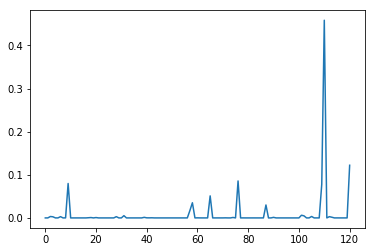

In [75]:
plt.plot(gb.feature_importances_)

In [74]:
df_imp = pd.DataFrame(data = {'Features': feat_total,
                     'importance' : gb.feature_importances_})

In [80]:
df_imp.sort_values(['importance'], ascending = False).head(10)

,Feaures,importance
110,entropy_11,0.458294
120,n_zero_crossings_11,0.122064
76,n_zero_crossings_7,0.085697
9,rms_1,0.079802
109,n_zero_crossings_10,0.077963
65,n_zero_crossings_6,0.051086
58,n75_6,0.035156
87,n_zero_crossings_8,0.030015
57,n25_6,0.016945
101,n25_10,0.006225


In [82]:
df_imp[df_imp.importance == 0].shape

(37, 2)

In [83]:
df_imp[df_imp.importance == 0]

,Feaures,importance
0,entropy_1,0.0
4,n95_1,0.0
11,entropy_2,0.0
12,n5_2,0.0
16,median_2,0.0
21,n_zero_crossings_2,0.0
22,entropy_3,0.0
27,median_3,0.0
33,entropy_4,0.0
37,n95_4,0.0
